In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d h13380436001/h-lung-cancer

100% 324k/324k [00:00<00:00, 1.93MB/s]
100% 324k/324k [00:00<00:00, 1.92MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/h-lung-cancer.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


In [ ]:

maper = {"M":1, 0:1,"F":0, 1:0, 2:1, "YES":1, "NO":0}
df["AGE_Catagory"] = pd.cut(df["AGE"],bins=[0,20,40,65,120],labels=[0,1,2,3])
df_2 = df.drop(["AGE","AGE_Catagory"],axis=1) #adds age coloumn in the chart
df_2 = df_2.applymap(lambda x: maper.get(x))
df_2["AGE_catagory"] = df["AGE_Catagory"]
df_2.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_catagory
0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,3
1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,3
2,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,2
3,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,2
4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,2


In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_Catagory
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,3
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,3
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2,2


In [ ]:
X = df.drop("LUNG_CANCER",axis=1)
y = df["LUNG_CANCER"]
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[-1])],remainder="passthrough")
X = ct.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=200,activation="relu"))
model.add(tf.keras.layers.Dense(units=100,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1299/1299 [==============================] - 9s 5ms/step - loss: -2200134144.0000 - accuracy: 0.5032 - val_loss: -12864902144.0000 - val_accuracy: 0.5047
Epoch 2/20
1299/1299 [==============================] - 6s 5ms/step - loss: -103473528832.0000 - accuracy: 0.5036 - val_loss: -281354633216.0000 - val_accuracy: 0.5047
Epoch 3/20
1299/1299 [==============================] - 7s 5ms/step - loss: -767209111552.0000 - accuracy: 0.5036 - val_loss: -1474965143552.0000 - val_accuracy: 0.5047
Epoch 4/20
1299/1299 [==============================] - 6s 5ms/step - loss: -2812977348608.0000 - accuracy: 0.5036 - val_loss: -4534313680896.0000 - val_accuracy: 0.5047
Epoch 5/20
1299/1299 [==============================] - 6s 5ms/step - loss: -7314623954944.0000 - accuracy: 0.5036 - val_loss: -10690438889472.0000 - val_accuracy: 0.5047
Epoch 6/20
1299/1299 [==============================] - 6s 5ms/step - loss: -15666974294016.0000 - accuracy: 0.5036 - val_loss: -21437205184512.0000 - val_ac

In [ ]:
print(f"train score : {model.evaluate(x_train,y_train)[1]}")
print(f"test score : {model.evaluate(x_test,y_test)[1]}")

1299/1299 [==============================] - 3s 2ms/step - loss: -2424434950406144.0000 - accuracy: 0.5036
train score : 0.5036225914955139
433/433 [==============================] - 1s 2ms/step - loss: -2415054741831680.0000 - accuracy: 0.5047
test score : 0.5047295689582825


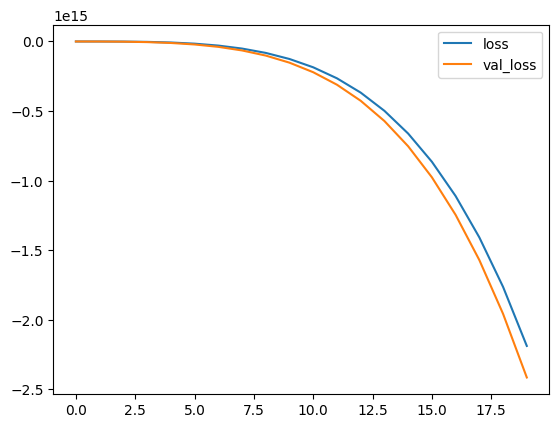

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

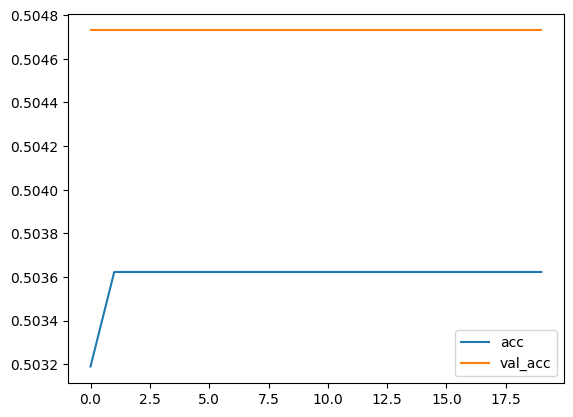

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.around(y_pred)
print(np.concatenate((y_pred.reshape(-1,1),y_test.values.reshape(-1,1)),1))

433/433 [==============================] - 1s 2ms/step
[[1. 2.]
 [1. 2.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 2.]
 [1. 2.]]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[6990    0]
 [6859    0]]
